# Mixed-age Ulva population modeling


$ \large{\frac{d a_i}{d t} = r_i a_i \left(1 - \frac{\sum_i^n a_i}{K} \right) + \lambda_i a_{i-1} - \lambda_{i+1} a_i - \sigma a_i f( I ) \quad i=1,2,\ldots, n }$


$ \large{ \frac{d I}{d t} = \sum_i^n a_i \theta_i - I \left( \sum_i^n \mu_i a_i \right) - \xi I + \gamma_I } $

* $a_i$ : vector of age masses (per m$^3$)
* $I$ : inhibitor content, not limited to units - probably need to be rescaled to some saturation value?
* $r_i$ : growth rate vector (per age)
* $K$ : saturation (logistic growth model, we decided about 10 kg/m$^3$)
* $\lambda$ : vector of 1/time resolution, e.g. 1 (for day by day age). All $\lambda_i$ are equal
* $\sigma$ : rate of algae degradation /destruction when there are no inhibitors
* $\theta_i$ : rate of creation of inhibitor, shall be large for young and negligible for older algae
* $\mu_i$ : rate of uptake of inhibitor from the surrounding, probably also better for young
* $\xi$ : rate of leakage, destruction of inhibitor, losses.
* $\gamma_I$ :   is the nutrient supply flux in the units of inhibitor concentration



In [4]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np

from algae_population import *

import matplotlib.pyplot as plt

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

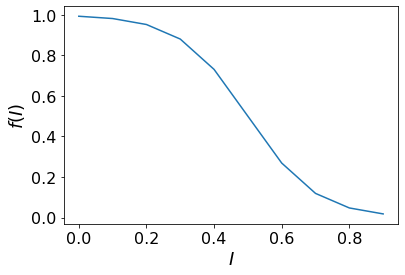

In [5]:
plt.plot(np.arange(0,1,0.1),f(np.arange(0,1,0.1)))
plt.ylabel(r'$f(I)$')
plt.xlabel(r'$I$');


### Set of run parameters: 


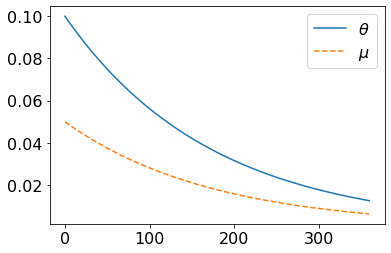

In [6]:
plt.plot(days,theta)
plt.plot(days,mu,'--')
plt.legend((r'$\theta$',r'$\mu$'))

## The evolution function of the set of ODEs

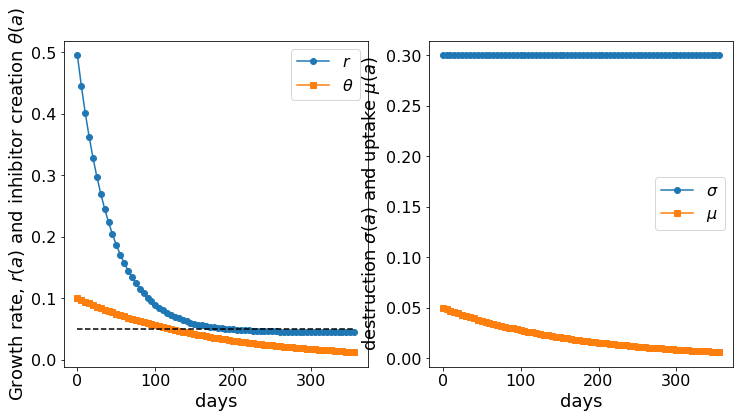

In [7]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

ax[0].plot(days[::5],[r(d) for d in days[::5]],'-o',days[::5],theta[::5],'-s')
ax[0].set_xlabel('days')
ax[0].set_ylabel(r'Growth rate, $r(a)$ and inhibitor creation $\theta(a)$')
# plt.title('Empirical data')
ax[0].legend((r'$r$',r'$\theta$'));
ax[0].plot(days[::5],0.05*np.ones_like(days[::5]),'k--')

ax[1].plot(days[::5],[sigma(d) for d in days[::5]],'-o',days[::5], mu[::5],'-s')
ax[1].legend((r'$\sigma$',r'$\mu$'));
ax[1].set_xlabel(r'days')
ax[1].set_ylabel(r'destruction $\sigma(a)$ and uptake $\mu(a)$');

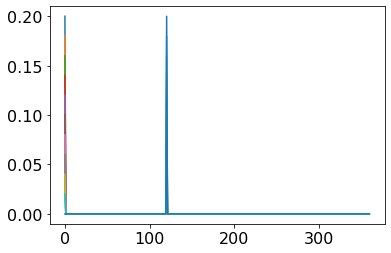

In [8]:
# plot initial distributions for each scenario
for s in scenarios.items():
    # print(s)
    a = scenario_to_age_distribution(s)
    plt.plot(a)

In [9]:
solutions = []
# simulation with mixture of old:
for s in scenarios.items():
    
    a = scenario_to_age_distribution(s)

    print(s)


    # if only young:
    # a = np.zeros((n_days))
    # a[0] = 0.5 # all young the units are actually kg/m^3 as it's normalized by K

    # simulation with a uniform mix of all ages, but in total should be 0.1K
    # a = np.ones((n_days))*K/n_days/100


    # initial inhibitor
    I = 0.0

    # this our vector of state variables: all a_i, i= 0...N-1
    # and I 
    # so it's N + 1 equations
    y = np.hstack((a,I))

    # this means that we stop the ODE when sporulation crosses zero from above
    sporulation.terminal = True
    sporulation.direction = -1

    # methods = ['RK45', 'RK23', 'DOP853', 'Radau', 'BDF', 'LSODA']
    methods = ['RK45']

    for method in methods:
        sol = solve_ivp(evolution, [t0, tend], y, 
            args=(K, lamda, xi, gammai, theta, mu, dilution, tau, sigma), 
            method=method, dense_output=True, events=sporulation)
        sol['s'] = s

    solutions.append(sol) 
        # other options are RK45, RK23, DOP853, Radau, BDF, LSODA
        # plot_results(sol, tend=240, K=10)

('100/0', [(0, 0.2)])
('90/10', [(0, 0.18000000000000002), (120, 0.020000000000000004)])
('80/20', [(0, 0.16000000000000003), (120, 0.04000000000000001)])
('70/30', [(0, 0.13999999999999999), (120, 0.06)])
('60/40', [(0, 0.12), (120, 0.08000000000000002)])
('50/50', [(0, 0.1), (120, 0.1)])
('40/60', [(0, 0.08000000000000002), (120, 0.12)])
('30/70', [(0, 0.06), (120, 0.13999999999999999)])
('20/80', [(0, 0.04000000000000001), (120, 0.16000000000000003)])
('10/90', [(0, 0.020000000000000004), (120, 0.18000000000000002)])
('0/100', [(120, 0.2)])


In [10]:
import pickle
pickle.dump(solutions, open('figure1r.p','wb'))

#   solutions = pickle.load(open('figure1.p','rb'))
# solutions = data[0]

In [11]:
# see figure1_create_plots.ipynb